In [161]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
import seaborn as sns
import smogn
from sklearn.preprocessing import LabelEncoder


# 讀取 Excel 表
df1 = pd.read_excel('/Users/ccit0915/Desktop/迴歸分析/回歸分析期末報告/台中市預售屋買賣資料11204.xlsx')
df2 = pd.read_excel('/Users/ccit0915/Desktop/迴歸分析/回歸分析期末報告/台中市預售屋買賣資料11301.xlsx')
df3 = pd.read_excel('/Users/ccit0915/Desktop/迴歸分析/回歸分析期末報告/台中市預售屋買賣資料11302.xlsx')
df4 = pd.read_excel('/Users/ccit0915/Desktop/迴歸分析/回歸分析期末報告/台中市預售屋買賣資料11303.xlsx')


# 合併 DataFrame
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# 顯示合併後的 DataFrame
print(df)

                   /預售屋/土地位置建物門牌  /預售屋/土地移轉總面積平方公尺  /預售屋/土地移轉總面積平方公尺/#agg  \
0                     臺中市北屯區祥順一街            105.70                 105.70   
1      臺中市新社區水底寮段上水底寮小段213地號等18筆            113.73                 113.73   
2              臺中市豐原區鎌村路107巷102弄             20.89                  20.89   
3              臺中市豐原區鎌村路107巷102弄             20.74                  20.74   
4                      臺中市梧棲區中華路             24.02                  24.02   
...                          ...               ...                    ...   
29106          臺中市太平區東平段191-12地號             79.73                  79.73   
29107          臺中市太平區東平段191-13地號             82.44                  82.44   
29108             臺中市西屯區惠民段114地號              9.58                   9.58   
29109             臺中市西屯區惠民段114地號              9.58                   9.58   
29110             臺中市西屯區惠民段114地號              6.73                   6.73   

      /預售屋/主要用途 /預售屋/主要建材  /預售屋/交易年月日  /預售屋/交易年月日/#agg /預售屋/交易筆棟數  \
0     

In [162]:
df.drop(columns=['/預售屋/土地移轉總面積平方公尺/#agg'], inplace=True)
df.drop(columns=['/預售屋/交易年月日/#agg'], inplace=True)
df.drop(columns=['/預售屋/單價元平方公尺/#agg'], inplace=True)
df.drop(columns=['/預售屋/總價元/#agg'], inplace=True)
df.drop(columns=['/預售屋/總樓層數/#agg'], inplace=True)
df.drop(columns=['/預售屋/車位移轉總面積平方公尺/#agg'], inplace=True)
df.drop(columns=['/預售屋/車位總價元/#agg'], inplace=True)
df.drop(columns=['/預售屋/建物現況格局-房/#agg'], inplace=True)
df.drop(columns=['/預售屋/建物現況格局-廳/#agg'], inplace=True)
df.drop(columns=['/預售屋/建物現況格局-衛/#agg'], inplace=True)
df.drop(columns=['/預售屋/建物移轉總面積平方公尺/#agg'], inplace=True)
df.drop(columns=['/預售屋/土地位置建物門牌'], inplace=True)
df.drop(columns=['/預售屋/有無管理組織'], inplace=True)
df.drop(columns=['/預售屋/棟及號'], inplace=True)
df.drop(columns=['/預售屋/解約情形'], inplace=True)
df.drop(columns=['/預售屋/編號'], inplace=True)
df.drop(columns=['/預售屋/建案名稱'], inplace=True)
df.drop(columns=['/預售屋/建築完成年月'], inplace=True)
df.drop(columns=['/預售屋/備註'], inplace=True)
df.drop(columns=['/預售屋/非都市土地使用分區'], inplace=True)
df.drop(columns=['/預售屋/非都市土地使用編定'], inplace=True)
df.drop(columns=['/預售屋/交易年月日'], inplace=True)

In [163]:
# 檢查缺失值
missing_values = df.isnull().sum()

# 顯示有缺失值的欄位
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

/預售屋/車位類別        2455
/預售屋/都市土地使用分區    1273
/預售屋/單價元平方公尺       10
/預售屋/鄉鎮市區          11
dtype: int64


In [164]:
# 刪除目標變數缺失值的10筆記錄
df = df.dropna(subset=["/預售屋/單價元平方公尺"])

# 將缺失值填入 "0" 表示無車位
df["/預售屋/車位類別"] = df["/預售屋/車位類別"].fillna("0")

# 以眾數填入缺失值
mode_value = df["/預售屋/都市土地使用分區"].mode()[0]
df["/預售屋/都市土地使用分區"] = df["/預售屋/都市土地使用分區"].fillna(mode_value)

# 刪除/預售屋/鄉鎮市區的缺失11筆記錄
df = df.dropna(subset=["/預售屋/鄉鎮市區"])

In [165]:
# 檢查缺失值
missing_values = df.isnull().sum()

# 顯示有缺失值的欄位
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


In [166]:
df.drop(columns=['/預售屋/總價元'], inplace=True)

In [167]:
# 定義中英對應字典
column_name_map = {
    '/預售屋/土地移轉總面積平方公尺': 'Land Transfer Area (sqm)',
    '/預售屋/主要用途': 'Main Use',
    '/預售屋/主要建材': 'Main Materials',
    '/預售屋/交易筆棟數': 'Transaction Volume',
    '/預售屋/交易標的': 'Transaction Target',
    '/預售屋/車位移轉總面積平方公尺': 'Parking Transfer Area (sqm)',
    '/預售屋/車位總價元': 'Parking Price',
    '/預售屋/車位類別': 'Parking Type',
    '/預售屋/建物型態': 'Building Type',
    '/預售屋/建物現況格局-房': 'House Layout - Room',
    '/預售屋/建物現況格局-隔間': 'House Layout - Partition',
    '/預售屋/建物現況格局-衛': 'House Layout - Bathroom',
    '/預售屋/建物現況格局-廳': 'House Layout - Living Room',
    '/預售屋/建物移轉總面積平方公尺': 'Building Transfer Area (sqm)',
    '/預售屋/移轉層次': 'Transfer Level',
    '/預售屋/都市土地使用分區': 'Urban Land Use Zone',
    '/預售屋/單價元平方公尺': 'Unit Price (per sqm)',
    '/預售屋/鄉鎮市區': 'Township/District',
    '/預售屋/總樓層數': 'Total Floors'
}
df.rename(columns=column_name_map, inplace=True)

In [168]:
# 顯示更新後的列名
print(df.columns)

Index(['Land Transfer Area (sqm)', 'Main Use', 'Main Materials',
       'Transaction Volume', 'Transaction Target',
       'Parking Transfer Area (sqm)', 'Parking Price', 'Parking Type',
       'Building Type', 'House Layout - Room', 'House Layout - Partition',
       'House Layout - Bathroom', 'House Layout - Living Room',
       'Building Transfer Area (sqm)', 'Transfer Level', 'Urban Land Use Zone',
       'Unit Price (per sqm)', 'Township/District', 'Total Floors'],
      dtype='object')


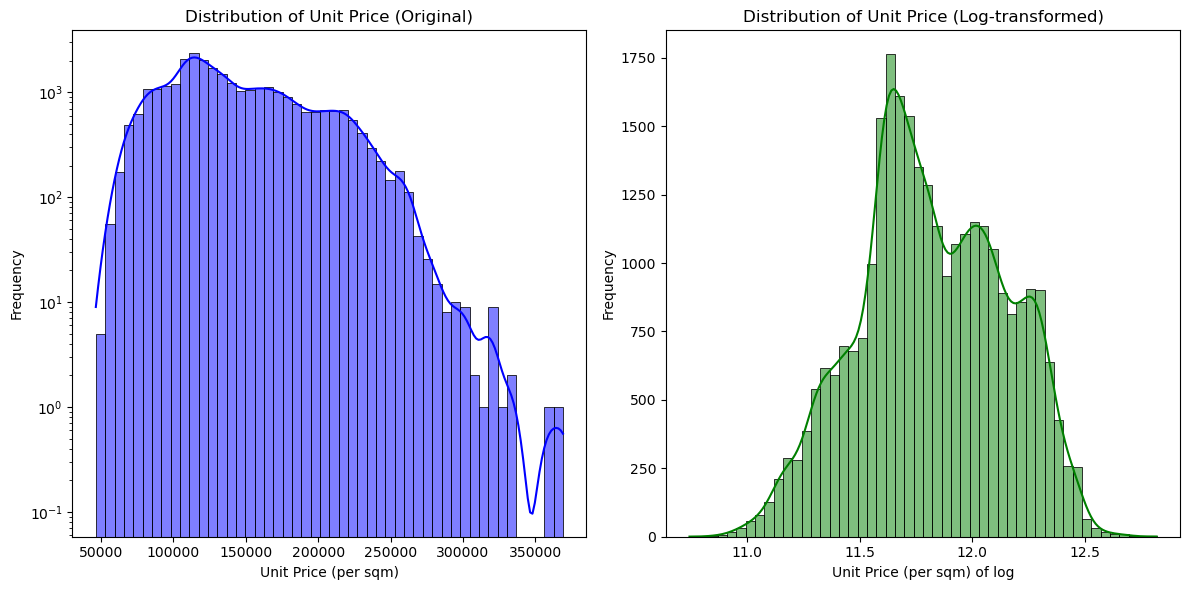

In [169]:
# 提取每平方公尺價格
up_total = df['Unit Price (per sqm)']

# 進行對數轉換
up_total_log = np.log(up_total)

# 畫圖
plt.figure(figsize=(12, 6))

# 原始數據分布
plt.subplot(1, 2, 1)
sns.histplot(up_total, bins=50, color='blue', kde=True)
plt.title('Distribution of Unit Price (Original)')
plt.xlabel('Unit Price (per sqm)')
plt.ylabel('Frequency')
plt.yscale('log')  # 使用對數尺度

# 對數轉換後數據分布
plt.subplot(1, 2, 2)
sns.histplot(up_total_log, bins=50, color='green', kde=True)
plt.title('Distribution of Unit Price (Log-transformed)')
plt.xlabel('Unit Price (per sqm) of log')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [170]:
# 對'Unit Price (per sqm)' 進行對數轉換
df['Unit Price (per sqm)'] = df['Unit Price (per sqm)'].apply(lambda x: np.log(x))

In [171]:
# 定義特徵和目標變數
X = df.drop(columns=['Unit Price (per sqm)'])  # 將目標變數從特徵集中移除
y = df['Unit Price (per sqm)']                # 定義目標變數

# 切割數據集，80% 用於訓練，20% 用於測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 LabelEncoder
label_encoder = LabelEncoder()

# 1. 標籤編碼（修正未知類別處理）
categorical_features = [
    "Main Use",
    "Main Materials",
    "Transaction Target",
    "House Layout - Partition",
    "Urban Land Use Zone"
]
# 標籤編碼
for feature in categorical_features:
    # 對訓練集進行標籤編碼
    X_train[f"{feature}_encoded"] = label_encoder.fit_transform(X_train[feature].copy())
    # 測試集應用相同的映射，對未見過的類別填補為 1
    label_mapping = {label: idx for idx, label in enumerate(label_encoder.classes_)}
    X_test[f"{feature}_encoded"] = X_test[feature].map(label_mapping).fillna(1)

# 2. 頻率編碼
frequency_features = [
    "Transaction Volume",
    "Building Type", 
    "Transfer Level"
]

for feature in frequency_features:
    # 計算頻率映射表
    freq_map = X_train[feature].value_counts(normalize=True)
    # 對訓練集應用頻率映射
    X_train[f"{feature}_freq"] = X_train[feature].map(freq_map).fillna(1)  # 填補為 1
    # 對測試集應用頻率映射，對未知值填補為 1
    X_test[f"{feature}_freq"] = X_test[feature].map(freq_map).fillna(1)  # 填補為 1

# 將 y_train 暫時加入到 X_train，以便進行目標編碼
X_train['Unit Price (per sqm)'] = y_train

# 目標編碼
target_encoding_features = [
    ("Parking Type", X_train["Parking Price"]),
    ("Township/District", X_train["Unit Price (per sqm)"])  # 使用目標變數進行編碼
]

for feature, target in target_encoding_features:
    # 計算基於目標值的目標編碼均值
    target_map = X_train.groupby(feature)[target.name].mean()
    # 對訓練集進行目標編碼
    X_train[f"{feature}_encoded"] = X_train[feature].map(target_map)
    # 測試集目標編碼，對未知值填補為目標值的全體均值
    X_test[f"{feature}_encoded"] = X_test[feature].map(target_map).fillna(target.mean())

# 移除暫時加入的目標變數，避免資料洩漏
X_train = X_train.drop(columns=["Unit Price (per sqm)"])

# 移除原始特徵以避免資料洩漏
X_train = X_train.drop(columns=categorical_features + frequency_features)
X_test = X_test.drop(columns=categorical_features + frequency_features)

In [172]:
X_train

,Land Transfer Area (sqm),Parking Transfer Area (sqm),Parking Price,Parking Type,House Layout - Room,House Layout - Bathroom,House Layout - Living Room,Building Transfer Area (sqm),Township/District,Total Floors,Main Use_encoded,Main Materials_encoded,Transaction Target_encoded,House Layout - Partition_encoded,Urban Land Use Zone_encoded,Transaction Volume_freq,Building Type_freq,Transfer Level_freq,Parking Type_encoded,Township/District_encoded
9311,26.11,72.98,3300000,坡道平面,3,2,1,165.62,大肚區,15,1,2,1,0,0,0.091569,0.810373,0.053283,2.389501e+06,11.497503
17627,50.22,61.40,4000000,坡道平面,3,2,2,238.58,北屯區,19,1,2,1,0,0,0.091569,0.810373,0.063768,2.389501e+06,12.007290
90,11.49,34.50,2400000,坡道平面,3,2,2,166.42,北區,28,1,2,1,0,2,0.006746,0.810373,0.015211,2.389501e+06,12.064227
11881,17.79,23.79,500000,坡道機械,2,2,2,119.67,龍井區,13,1,2,1,0,0,0.102827,0.810373,0.050232,1.084311e+06,11.498559
27960,16.33,36.63,1850000,坡道平面,3,2,2,163.07,太平區,15,1,2,1,0,2,0.551306,0.810373,0.044775,2.389501e+06,11.649040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,151.17,0.00,0,0,3,4,2,266.37,北屯區,4,1,2,0,0,0,0.004211,0.054357,0.054916,0.000000e+00,12.007290
5398,62.81,0.00,0,0,4,3,2,140.08,沙鹿區,3,1,2,0,0,0,0.012289,0.054357,0.054916,0.000000e+00,11.590554
862,14.49,52.26,4700000,坡道平面,3,2,2,250.46,西屯區,28,1,5,1,0,2,0.023032,0.810373,0.015727,2.389501e+06,12.270828
15808,26.58,26.01,1850000,坡道平面,3,2,2,157.07,太平區,15,0,2,1,0,0,0.551306,0.810373,0.044775,2.389501e+06,11.649040


In [173]:
X_train.drop(columns=['Parking Type'], inplace=True)
X_train.drop(columns=['Township/District'], inplace=True)

X_test.drop(columns=['Parking Type'], inplace=True)
X_test.drop(columns=['Township/District'], inplace=True)

In [174]:
print(X_train.shape)
print(X_test.shape)

(23272, 18)
(5819, 18)


In [175]:
X_train['Parking Price'] = X_train['Parking Price'].apply(lambda x: np.log(x) if x > 0 else 0)
X_train['Land Transfer Area (sqm)'] = X_train['Land Transfer Area (sqm)'].apply(lambda x: np.log(x) if x > 0 else 0)
X_train['Building Transfer Area (sqm)'] = X_train['Building Transfer Area (sqm)'].apply(lambda x: np.log(x) if x > 0 else 0)

X_test['Parking Price'] = X_test['Parking Price'].apply(lambda x: np.log(x) if x > 0 else 0)
X_test['Land Transfer Area (sqm)'] = X_test['Land Transfer Area (sqm)'].apply(lambda x: np.log(x) if x > 0 else 0)
X_test['Building Transfer Area (sqm)'] = X_test['Building Transfer Area (sqm)'].apply(lambda x: np.log(x) if x > 0 else 0)

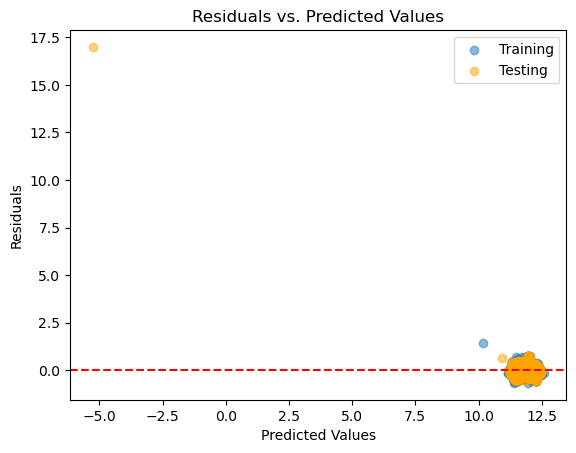

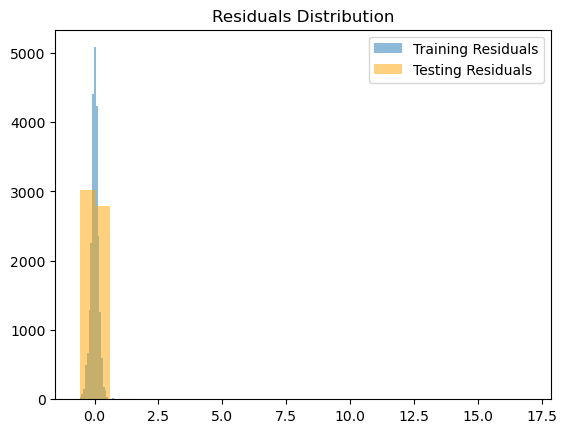

In [176]:
import matplotlib.pyplot as plt
import numpy as np

# 計算殘差
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# 殘差 vs. 預測值圖
plt.scatter(y_pred_train, residuals_train, alpha=0.5, label="Training")
plt.scatter(y_pred_test, residuals_test, alpha=0.5, label="Testing", color="orange")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# 檢查殘差的分佈
plt.hist(residuals_train, bins=30, alpha=0.5, label="Training Residuals")
plt.hist(residuals_test, bins=30, alpha=0.5, label="Testing Residuals", color="orange")
plt.title("Residuals Distribution")
plt.legend()
plt.show()

In [131]:
# 回歸係數
coef = model.coef_
feature_importance = sorted(zip(X_train.columns, coef), key=lambda x: abs(x[1]), reverse=True)
print("Feature Importance (Linear Coefficients):")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

Feature Importance (Linear Coefficients):
Transaction Target_encoded: 2725562759.6437
Parking Transfer Area (sqm): -2725562759.2301
Transaction Volume_freq: -2.4823
Township/District_encoded: -2.0756
House Layout - Bathroom: 1.3222
House Layout - Room: 0.9676
Main Materials_encoded: 0.9655
Parking Type_encoded: -0.2131
Parking Price: 0.2067
Transfer Level_freq: -0.1492
Land Transfer Area (sqm): 0.1476
House Layout - Partition_encoded: -0.1202
Building Type_freq: -0.0697
House Layout - Living Room: -0.0590
Main Use_encoded: 0.0327
Total Floors: 0.0308
Building Transfer Area (sqm): 0.0232
Urban Land Use Zone_encoded: -0.0199


In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 計算 VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

                             feature          VIF
0           Land Transfer Area (sqm)   105.256089
1        Parking Transfer Area (sqm)    13.103245
2                      Parking Price   149.688111
3                House Layout - Room    25.582866
4            House Layout - Bathroom    19.550063
5         House Layout - Living Room    30.145564
6       Building Transfer Area (sqm)  1196.574415
7                       Total Floors    17.310992
8                   Main Use_encoded     6.577373
9             Main Materials_encoded    11.804225
10        Transaction Target_encoded   115.421064
11  House Layout - Partition_encoded     2.180470
12       Urban Land Use Zone_encoded     2.457851
13           Transaction Volume_freq     4.485360
14                Building Type_freq    15.135896
15               Transfer Level_freq    11.008818
16              Parking Type_encoded    58.442253
17         Township/District_encoded   635.940757


In [133]:
import statsmodels.api as sm

# 確保 X_train 包含常數列
X_train_with_const = sm.add_constant(X_train)

# 執行 Breusch-Pagan 檢驗
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(residuals_train, X_train_with_const)
print(f"Breusch-Pagan Test p-value: {pval:.4f}")

Breusch-Pagan Test p-value: 0.0000


In [134]:
# 4. 計算 VIF 並刪除高共線性特徵
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# 刪除 VIF > 10 的特徵
high_vif_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
X_train_reduced = X_train.drop(columns=high_vif_features)
X_test_reduced = X_test.drop(columns=high_vif_features)

print("刪除的高共線性特徵：", high_vif_features)
print("剩餘的特徵：", X_train_reduced.columns)

刪除的高共線性特徵： ['Land Transfer Area (sqm)', 'Parking Transfer Area (sqm)', 'Parking Price', 'House Layout - Room', 'House Layout - Bathroom', 'House Layout - Living Room', 'Building Transfer Area (sqm)', 'Total Floors', 'Main Materials_encoded', 'Transaction Target_encoded', 'Building Type_freq', 'Transfer Level_freq', 'Parking Type_encoded', 'Township/District_encoded']
剩餘的特徵： Index(['Main Use_encoded', 'House Layout - Partition_encoded',
       'Urban Land Use Zone_encoded', 'Transaction Volume_freq'],
      dtype='object')


In [136]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# 使用剩餘特徵進行多項式回歸
selected_features = ['Main Use_encoded', 'House Layout - Partition_encoded',
                     'Urban Land Use Zone_encoded', 'Transaction Volume_freq'
                     ]

# 生成多項式特徵 (2次)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_reduced[selected_features])
X_test_poly = poly.transform(X_test_reduced[selected_features])

# 拆解多項式特徵名稱
poly_feature_names = poly.get_feature_names_out(selected_features)

# 多項式回歸
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 模型解釋與統計檢驗
# 使用 statsmodels 進行回歸分析
X_train_poly_sm = sm.add_constant(X_train_poly)  # 添加截距項
ols_model = sm.OLS(y_train, X_train_poly_sm).fit()

# 打印回歸結果
print(ols_model.summary())

# --- 1. 多重共線性檢驗 ---
vif_data = pd.DataFrame()
vif_data['feature'] = ['const'] + poly_feature_names.tolist()  # 加上截距項
vif_data['VIF'] = [variance_inflation_factor(X_train_poly_sm, i) for i in range(X_train_poly_sm.shape[1])]
print("多重共線性檢驗（VIF）：\n", vif_data)

# --- 2. 異質性檢驗 ---
# 使用 Breusch-Pagan 檢驗
_, pval, __, f_pval = het_breuschpagan(ols_model.resid, X_train_poly_sm)
print("異質性檢驗 (Breusch-Pagan) 的 p-value：", pval)

# --- 3. 模型顯著性檢驗 ---
# 模型顯著性 (F 檢驗)
print("模型 F 檢驗的 p-value：", ols_model.f_pvalue)

# --- 4. 殘差自相關檢驗 ---
# 使用 Durbin-Watson 檢驗
dw_stat = durbin_watson(ols_model.resid)
print("Durbin-Watson 統計量：", dw_stat)

# --- 5. 測試集預測 ---
# 預測結果
y_pred = model.predict(X_test_poly)

# 模型評估 (R²)
test_r2 = model.score(X_test_poly, y_test)
print("測試集 R²：", test_r2)

                             OLS Regression Results                             
Dep. Variable:     Unit Price (per sqm)   R-squared:                       0.220
Model:                              OLS   Adj. R-squared:                  0.219
Method:                   Least Squares   F-statistic:                     467.7
Date:                  Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                          23:32:46   Log-Likelihood:                -3901.4
No. Observations:                 23272   AIC:                             7833.
Df Residuals:                     23257   BIC:                             7954.
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5131      0.022

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


多重共線性檢驗（VIF）：
                                               feature         VIF
0                                               const  142.766558
1                                    Main Use_encoded   44.403139
2                    House Layout - Partition_encoded         inf
3                         Urban Land Use Zone_encoded   33.342398
4                             Transaction Volume_freq  136.222057
5                                  Main Use_encoded^2   25.120881
6   Main Use_encoded House Layout - Partition_encoded    6.989807
7        Main Use_encoded Urban Land Use Zone_encoded   19.984223
8            Main Use_encoded Transaction Volume_freq   10.690287
9                  House Layout - Partition_encoded^2         inf
10  House Layout - Partition_encoded Urban Land Us...    3.962626
11  House Layout - Partition_encoded Transaction V...    2.562822
12                      Urban Land Use Zone_encoded^2   10.114319
13  Urban Land Use Zone_encoded Transaction Volume...    3.32

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Training R²: 0.8128
Test R²: 0.8023
Training Adjusted R²: 0.8126
Test Adjusted R²: 0.8017

獨立性檢驗（Durbin-Watson）:
Training DW: 2.0060
Test DW: 2.0405

殘差常態性檢驗:
Training Shapiro-Wilk p-value: 0.0000
Test Shapiro-Wilk p-value: 0.0000
Training Jarque-Bera p-value: 0.0000
Test Jarque-Bera p-value: 0.0000

異質性檢驗（Breusch-Pagan）:
Training Breusch-Pagan p-value: 0.0000
Test Breusch-Pagan p-value: 0.0000


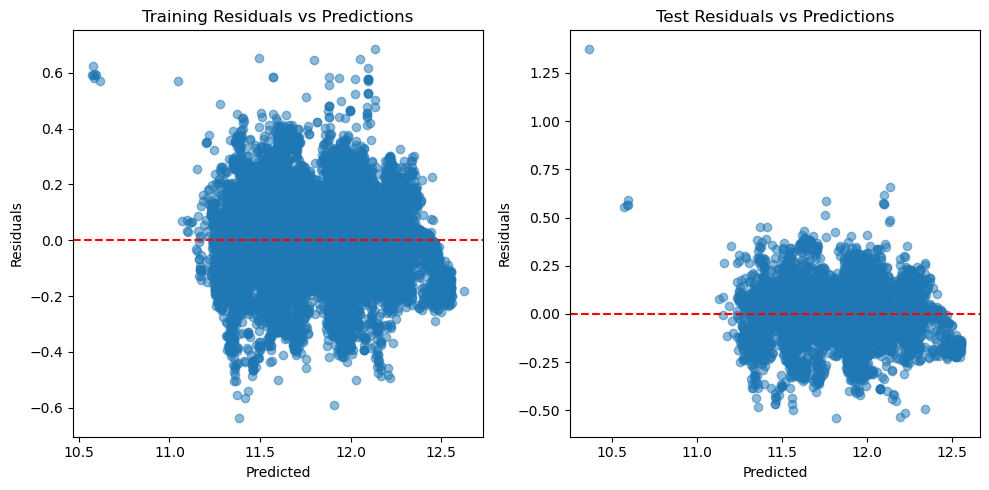

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import shapiro, jarque_bera
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# 假設 X_train, X_test, y_train, y_test 已經準備好

# 1. 使用18個特徵進行線性回歸
model = LinearRegression()
model.fit(X_train, y_train)

# 預測訓練集和測試集
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 計算R²
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# 計算調整後的R²
n_train = X_train.shape[0]
p = X_train.shape[1]
train_ra2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)

n_test = X_test.shape[0]
test_ra2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

# 計算殘差
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# 獨立性檢驗：Durbin-Watson 檢驗
dw_stat_train = sm.stats.durbin_watson(residuals_train)
dw_stat_test = sm.stats.durbin_watson(residuals_test)

# 殘差常態性檢驗：Shapiro-Wilk 和 Jarque-Bera 檢驗
shapiro_stat_train, shapiro_p_train = shapiro(residuals_train)
shapiro_stat_test, shapiro_p_test = shapiro(residuals_test)

jb_stat_train, jb_p_train = jarque_bera(residuals_train)
jb_stat_test, jb_p_test = jarque_bera(residuals_test)

# 異質性檢驗：Breusch-Pagan 檢驗
bp_test_train = sm.stats.diagnostic.het_breuschpagan(residuals_train, sm.add_constant(X_train))
bp_test_test = sm.stats.diagnostic.het_breuschpagan(residuals_test, sm.add_constant(X_test))
bp_pval_train = bp_test_train[1]
bp_pval_test = bp_test_test[1]

# 顯示結果
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Training Adjusted R²: {train_ra2:.4f}")
print(f"Test Adjusted R²: {test_ra2:.4f}")

print("\n獨立性檢驗（Durbin-Watson）:")
print(f"Training DW: {dw_stat_train:.4f}")
print(f"Test DW: {dw_stat_test:.4f}")

print("\n殘差常態性檢驗:")
print(f"Training Shapiro-Wilk p-value: {shapiro_p_train:.4f}")
print(f"Test Shapiro-Wilk p-value: {shapiro_p_test:.4f}")
print(f"Training Jarque-Bera p-value: {jb_p_train:.4f}")
print(f"Test Jarque-Bera p-value: {jb_p_test:.4f}")

print("\n異質性檢驗（Breusch-Pagan）:")
print(f"Training Breusch-Pagan p-value: {bp_pval_train:.4f}")
print(f"Test Breusch-Pagan p-value: {bp_pval_test:.4f}")

# 殘差圖
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.title("Training Residuals vs Predictions")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.title("Test Residuals vs Predictions")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 添加截距項
X_train_with_intercept = pd.DataFrame(X_train)
X_train_with_intercept['Intercept'] = 1

# 計算 VIF 值
vif_data = pd.DataFrame({
    "Variable": X_train_with_intercept.columns,
    "VIF": [variance_inflation_factor(X_train_with_intercept.values, i) for i in range(X_train_with_intercept.shape[1])]
})

# 排除截距的 VIF 值
vif_data = vif_data[vif_data["Variable"] != "Intercept"]

# 顯示結果
print(vif_data.sort_values(by="VIF", ascending=False))

                            Variable        VIF
2                      Parking Price  13.666582
10        Transaction Target_encoded   9.481559
17              Parking Type_encoded   6.407131
6       Building Transfer Area (sqm)   5.227324
0           Land Transfer Area (sqm)   4.292406
1        Parking Transfer Area (sqm)   3.381976
7                       Total Floors   3.337107
4            House Layout - Bathroom   3.145227
3                House Layout - Room   2.787729
14                Building Type_freq   2.363822
11  House Layout - Partition_encoded   2.131837
5         House Layout - Living Room   1.926388
13           Transaction Volume_freq   1.650170
12       Urban Land Use Zone_encoded   1.597999
16               Transfer Level_freq   1.370751
15            Township/District_freq   1.247945
8                   Main Use_encoded   1.157462
9             Main Materials_encoded   1.027768


In [25]:
# 刪除高 VIF 變數 Parking Price
X_train_reduced = X_train.drop(columns=["Parking Price", 'Transaction Target_encoded'])
X_test_reduced = X_test.drop(columns=["Parking Price", 'Transaction Target_encoded'])

# 重新計算 VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data_reduced = pd.DataFrame({
    "Variable": X_train_reduced.columns,
    "VIF": [variance_inflation_factor(X_train_reduced.values, i) for i in range(X_train_reduced.shape[1])]
})

# 顯示新 VIF 值
print(vif_data_reduced.sort_values(by="VIF", ascending=False))

                            Variable         VIF
16                         Intercept  730.093081
5       Building Transfer Area (sqm)    5.226472
0           Land Transfer Area (sqm)    4.227853
15              Parking Type_encoded    3.694757
6                       Total Floors    3.320024
1        Parking Transfer Area (sqm)    3.093880
3            House Layout - Bathroom    3.080147
2                House Layout - Room    2.787178
12                Building Type_freq    2.362356
9   House Layout - Partition_encoded    2.108298
4         House Layout - Living Room    1.923928
11           Transaction Volume_freq    1.596842
10       Urban Land Use Zone_encoded    1.581026
14               Transfer Level_freq    1.361285
13            Township/District_freq    1.245657
7                   Main Use_encoded    1.149443
8             Main Materials_encoded    1.027412


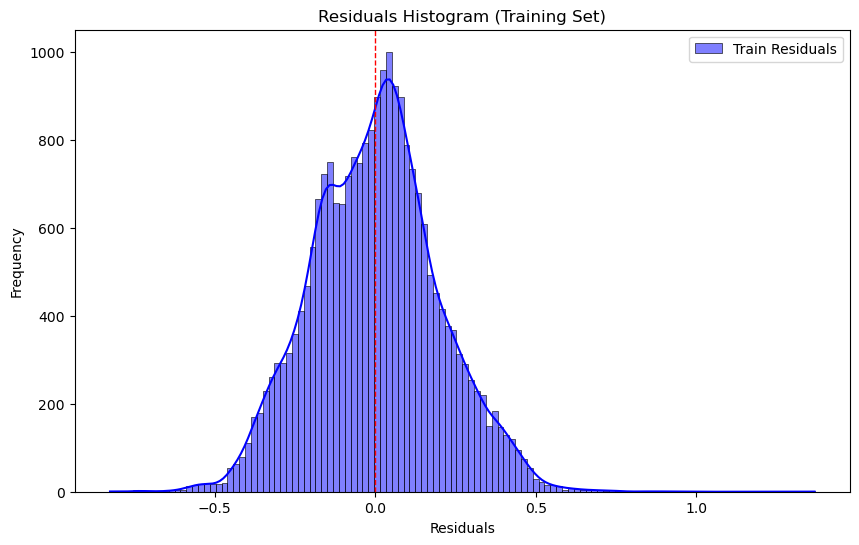

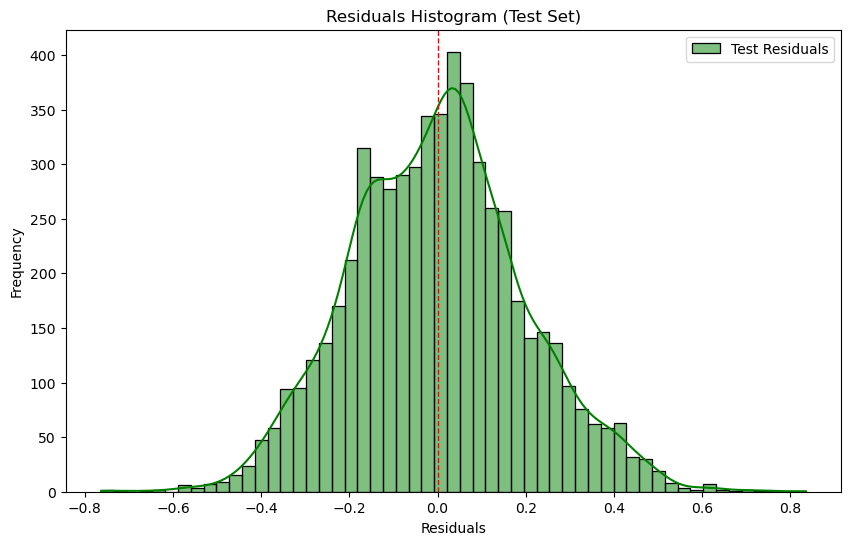

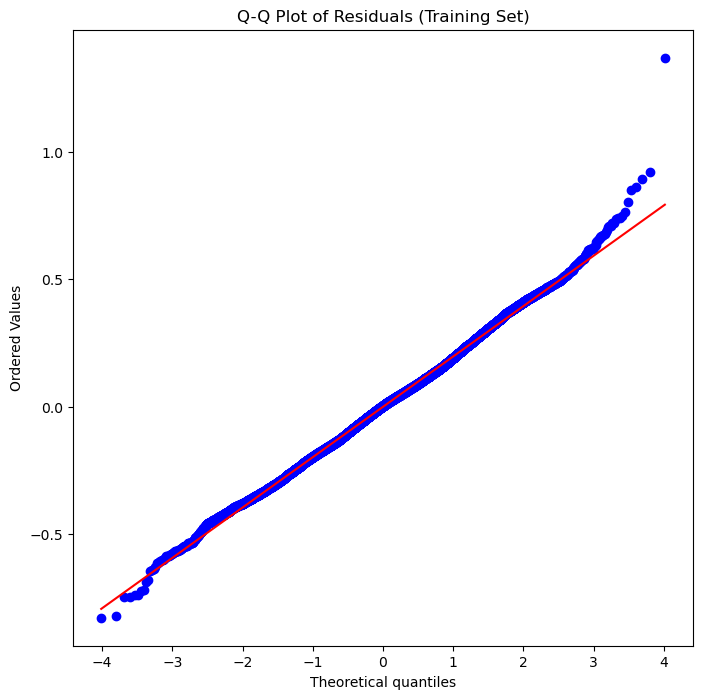

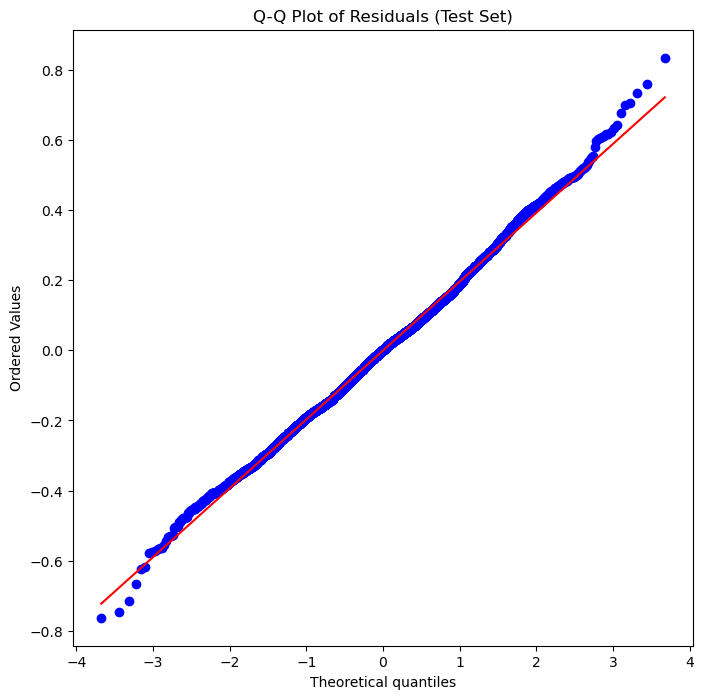

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 計算殘差
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# 繪製訓練集殘差的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(residuals_train, kde=True, color='blue', label='Train Residuals')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals Histogram (Training Set)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 繪製測試集殘差的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(residuals_test, kde=True, color='green', label='Test Residuals')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals Histogram (Test Set)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 繪製 Q-Q 圖（訓練集）
plt.figure(figsize=(8, 8))
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Training Set)")
plt.show()

# 繪製 Q-Q 圖（測試集）
plt.figure(figsize=(8, 8))
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Test Set)")
plt.show()

Removed 49 extreme value rows from training data.


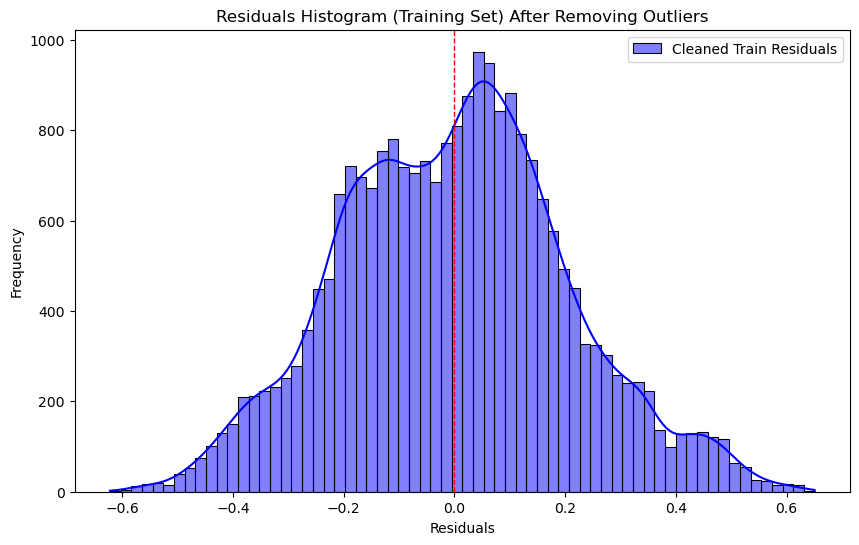

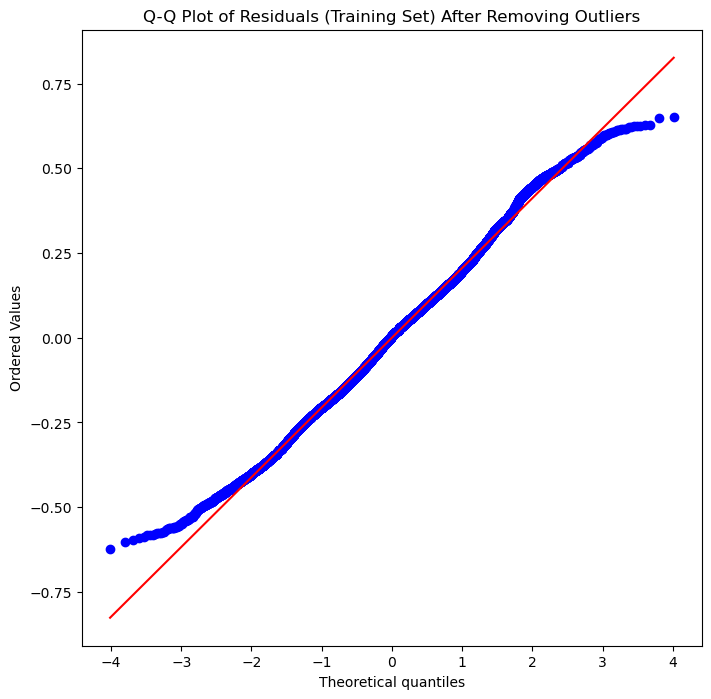

In [21]:
from scipy.stats import zscore

# 計算殘差 z 分數
residuals_z = zscore(residuals_train)

# 設置 z 分數閾值（極端值標準）
threshold = 3

# 找出不包含極端值的索引
non_outlier_indices = np.abs(residuals_z) <= threshold

# 刪除極端值對應的數據
X_train_cleaned = X_train[non_outlier_indices]
y_train_cleaned = y_train[non_outlier_indices]

# 確認刪除的數據量
removed_count = X_train.shape[0] - X_train_cleaned.shape[0]
print(f"Removed {removed_count} extreme value rows from training data.")

# 重新訓練線性回歸模型
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# 再次預測和計算殘差
y_pred_train_cleaned = model_cleaned.predict(X_train_cleaned)
new_residuals_train = y_train_cleaned - y_pred_train_cleaned

# 繪製新的殘差圖和 Q-Q 圖
plt.figure(figsize=(10, 6))
sns.histplot(new_residuals_train, kde=True, color='blue', label='Cleaned Train Residuals')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals Histogram (Training Set) After Removing Outliers")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(8, 8))
stats.probplot(new_residuals_train, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Training Set) After Removing Outliers")
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

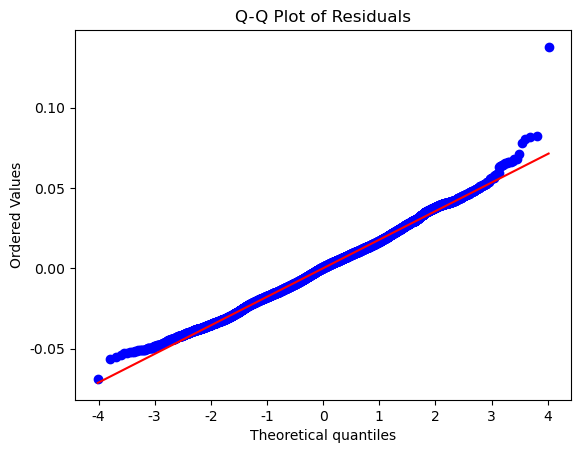

Shapiro-Wilk Test p-value: 0.0000


/Users/ccit0915/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [181]:
import scipy.stats as stats

# 計算殘差
residuals = y_train - y_pred_train

# 繪製 Q-Q 圖
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk 檢驗
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue:.4f}")

In [182]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson 檢驗
dw = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw:.4f}")

Durbin-Watson Statistic: 2.0081


In [184]:
import numpy as np
import pandas as pd
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.tools import add_constant

# 假設 residuals 和 X_train 已經定義
# 添加常數項到解釋變數
X_train_with_const = add_constant(X_train)

# Breusch-Pagan 檢驗
bp_test = het_breuschpagan(residuals, X_train_with_const)

# 結果
print(f"Lagrange Multiplier Statistic: {bp_test[0]:.4f}")
print(f"p-value: {bp_test[1]:.4f}")
print(f"f-value: {bp_test[2]:.4f}")
print(f"f p-value: {bp_test[3]:.4f}")

Lagrange Multiplier Statistic: 1994.5660
p-value: 0.0000
f-value: 121.0976
f p-value: 0.0000


In [179]:
X_train

,Land Transfer Area (sqm),Parking Transfer Area (sqm),Parking Price,House Layout - Room,House Layout - Bathroom,House Layout - Living Room,Building Transfer Area (sqm),Total Floors,Main Use_encoded,Main Materials_encoded,Transaction Target_encoded,House Layout - Partition_encoded,Urban Land Use Zone_encoded,Transaction Volume_freq,Building Type_freq,Transfer Level_freq,Parking Type_encoded,Township/District_encoded
9311,3.262318,72.98,15.009433,3,2,1,5.109696,15,1,2,1,0,0,0.091569,0.810373,0.053283,2.389501e+06,11.497503
17627,3.916413,61.40,15.201805,3,2,2,5.474705,19,1,2,1,0,0,0.091569,0.810373,0.063768,2.389501e+06,12.007290
90,2.441477,34.50,14.690979,3,2,2,5.114515,28,1,2,1,0,2,0.006746,0.810373,0.015211,2.389501e+06,12.064227
11881,2.878637,23.79,13.122363,2,2,2,4.784738,13,1,2,1,0,0,0.102827,0.810373,0.050232,1.084311e+06,11.498559
27960,2.793004,36.63,14.430696,3,2,2,5.094180,15,1,2,1,0,2,0.551306,0.810373,0.044775,2.389501e+06,11.649040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,5.018405,0.00,0.000000,3,4,2,5.584886,4,1,2,0,0,0,0.004211,0.054357,0.054916,0.000000e+00,12.007290
5398,4.140114,0.00,0.000000,4,3,2,4.942214,3,1,2,0,0,0,0.012289,0.054357,0.054916,0.000000e+00,11.590554
862,2.673459,52.26,15.363073,3,2,2,5.523299,28,1,5,1,0,2,0.023032,0.810373,0.015727,2.389501e+06,12.270828
15808,3.280159,26.01,14.430696,3,2,2,5.056692,15,0,2,1,0,0,0.551306,0.810373,0.044775,2.389501e+06,11.649040


In [181]:
X_test

,Land Transfer Area (sqm),Parking Transfer Area (sqm),Parking Price,House Layout - Room,House Layout - Bathroom,House Layout - Living Room,Building Transfer Area (sqm),Total Floors,Main Use_encoded,Main Materials_encoded,Transaction Target_encoded,House Layout - Partition_encoded,Urban Land Use Zone_encoded,Transaction Volume_freq,Building Type_freq,Transfer Level_freq,Parking Type_encoded,Township/District_encoded
16794,2.301585,27.80,14.403297,2,1,2,4.682872,24,1,2,1,0,2,0.551306,0.810373,0.053283,2.389501e+06,11.728561
3230,2.687847,27.30,14.285514,3,2,2,4.971201,28,1,2,1,0,2,0.551306,0.810373,0.054873,2.389501e+06,11.728561
2248,2.771338,34.45,14.508658,2,2,2,4.927761,15,1,2,1,0,0,0.551306,0.810373,0.015727,2.389501e+06,12.007290
3180,2.645465,27.30,14.285514,3,2,2,4.937706,28,1,2,1,0,2,0.551306,0.810373,0.013836,2.389501e+06,11.728561
6489,1.998774,28.96,14.533350,2,1,2,4.721886,34,1,5,1,0,2,0.551306,0.810373,0.017575,2.389501e+06,12.270828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23135,4.192378,25.18,14.690979,4,3,2,5.544826,27,1,2,1,0,0,0.551306,0.810373,0.069182,2.389501e+06,12.007290
1561,3.095125,26.50,14.603968,2,2,2,4.740837,14,1,2,1,0,0,0.004254,0.810373,0.044775,2.389501e+06,12.007290
15461,3.445214,26.50,14.648420,3,2,2,5.020123,14,1,2,1,0,0,0.002836,0.810373,0.069998,2.389501e+06,12.007290
24214,1.845300,29.75,14.626441,0,0,0,4.494015,26,2,2,1,1,2,0.102827,0.020067,0.069182,2.389501e+06,12.270828


In [182]:
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import shapiro, jarque_bera
import statsmodels.api as sm

# 確保 X_train 和 X_test 含有所有原始特徵
all_features = X_train.columns.tolist()

# 儲存最好的結果
best_r2_train = -float('inf')
best_r2_test = -float('inf')
best_adj_r2_train = -float('inf')
best_adj_r2_test = -float('inf')
best_features = []
best_residuals_train = None
best_residuals_test = None

# 從 1 到 5 個特徵組合進行窮舉
for num_features in range(1, 6):  # 1 到 5
    feature_combinations = itertools.combinations(all_features, num_features)

    # 窮舉每一個特徵組合
    for combination in feature_combinations:
        selected_combination = list(combination)

        # 根據選擇的特徵來選擇訓練和測試數據
        X_train_subset = X_train[selected_combination]
        X_test_subset = X_test[selected_combination]

        # 訓練模型
        model_poly = LinearRegression()
        model_poly.fit(X_train_subset, y_train)

        # 預測
        y_pred_train = model_poly.predict(X_train_subset)
        y_pred_test = model_poly.predict(X_test_subset)

        # 計算 R² 和調整後的 R²
        n_train = X_train_subset.shape[0]  # 訓練樣本數
        p_train = X_train_subset.shape[1]  # 特徵數
        r2_train = r2_score(y_train, y_pred_train)
        adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)

        n_test = X_test_subset.shape[0]  # 測試樣本數
        r2_test = r2_score(y_test, y_pred_test)
        adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_train - 1)

        # 如果當前組合的表現更好，則更新最好的結果
        if adj_r2_train > best_adj_r2_train:
            best_r2_train = r2_train
            best_r2_test = r2_test
            best_adj_r2_train = adj_r2_train
            best_adj_r2_test = adj_r2_test
            best_features = selected_combination
            best_residuals_train = y_train - y_pred_train
            best_residuals_test = y_test - y_pred_test

# 獨立性檢驗（Durbin-Watson 檢驗）
dw_stat_train = sm.stats.durbin_watson(best_residuals_train)
dw_stat_test = sm.stats.durbin_watson(best_residuals_test)

# 殘差常態性檢驗
shapiro_stat_train, shapiro_p_train = shapiro(best_residuals_train)
shapiro_stat_test, shapiro_p_test = shapiro(best_residuals_test)

jb_stat_train, jb_p_train = jarque_bera(best_residuals_train)
jb_stat_test, jb_p_test = jarque_bera(best_residuals_test)

# 異質性檢驗（Breusch-Pagan 檢驗）
# 使用基於 X_train 和 X_test 的選定特徵
bp_test_train = sm.stats.diagnostic.het_breuschpagan(best_residuals_train, sm.add_constant(X_train[best_features]))
bp_test_test = sm.stats.diagnostic.het_breuschpagan(best_residuals_test, sm.add_constant(X_test[best_features]))
bp_pval_train = bp_test_train[1]
bp_pval_test = bp_test_test[1]

# 輸出結果
print(f"Best Features: {best_features}")
print(f"Train R²: {best_r2_train:.4f}")
print(f"Test R²: {best_r2_test:.4f}")
print(f"Train Adjusted R²: {best_adj_r2_train:.4f}")
print(f"Test Adjusted R²: {best_adj_r2_test:.4f}")

print("\n獨立性檢驗（Durbin-Watson）:")
print(f"Training DW: {dw_stat_train:.4f}")
print(f"Test DW: {dw_stat_test:.4f}")

print("\n殘差常態性檢驗:")
print(f"Training Shapiro-Wilk p-value: {shapiro_p_train:.4f}")
print(f"Test Shapiro-Wilk p-value: {shapiro_p_test:.4f}")
print(f"Training Jarque-Bera p-value: {jb_p_train:.4f}")
print(f"Test Jarque-Bera p-value: {jb_p_test:.4f}")

print("\n異質性檢驗（Breusch-Pagan）:")
print(f"Training Breusch-Pagan p-value: {bp_pval_train:.4f}")
print(f"Test Breusch-Pagan p-value: {bp_pval_test:.4f}")

Best Features: ['Land Transfer Area (sqm)', 'Parking Transfer Area (sqm)', 'Building Transfer Area (sqm)', 'Total Floors', 'Township/District_encoded']
Train R²: 0.8003
Test R²: 0.7942
Train Adjusted R²: 0.8002
Test Adjusted R²: 0.7941

獨立性檢驗（Durbin-Watson）:
Training DW: 2.0044
Test DW: 2.0338

殘差常態性檢驗:
Training Shapiro-Wilk p-value: 0.0000
Test Shapiro-Wilk p-value: 0.0000
Training Jarque-Bera p-value: 0.0000
Test Jarque-Bera p-value: 0.0000

異質性檢驗（Breusch-Pagan）:
Training Breusch-Pagan p-value: 0.0000
Test Breusch-Pagan p-value: 0.0000


/Users/ccit0915/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [155]:
import pandas as pd
import itertools

# 假設您已經選擇了這些特徵
selected_features = ['Land Transfer Area (sqm)', 'House Layout - Room', 'Total Floors', 'Transfer Level_freq', 'Township/District_encoded']

# 只保留選定特徵的原始數據
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

# 計算交互作用項和平方項（在 X_train 和 X_test 中都進行相同操作）
for feature1, feature2 in itertools.combinations(selected_features, 2):
    # 計算 X_train 和 X_test 的兩兩特徵交互作用項
    X_train_selected[f'{feature1}_{feature2}_interaction'] = X_train_selected[feature1] * X_train_selected[feature2]
    X_test_selected[f'{feature1}_{feature2}_interaction'] = X_test_selected[feature1] * X_test_selected[feature2]

# 計算每個特徵的平方項（在 X_train 和 X_test 中都進行相同操作）
for feature in selected_features:
    X_train_selected[f'{feature}_squared'] = X_train_selected[feature] ** 2
    X_test_selected[f'{feature}_squared'] = X_test_selected[feature] ** 2

# 檢查生成後的特徵數量
print(X_train_selected.shape)
print(X_test_selected.shape)

# 使用選定的特徵訓練模型
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_poly = LinearRegression()
model_poly.fit(X_train_selected, y_train)

# 預測
y_pred_train = model_poly.predict(X_train_selected)
y_pred_test = model_poly.predict(X_test_selected)

# 計算 R² 與調整後的 R²
n_train = X_train_selected.shape[0]  # 訓練樣本數
p_train = X_train_selected.shape[1]  # 特徵數
r2_train = r2_score(y_train, y_pred_train)
adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)

n_test = X_test_selected.shape[0]  # 測試樣本數
r2_test = r2_score(y_test, y_pred_test)
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_train - 1)  # 使用同樣的特徵數

# 輸出結果
print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}")
print(f"Test Adjusted R²: {adj_r2_test:.4f}")

(23272, 20)
(5819, 20)
Train R²: 0.8100
Test R²: 0.7859
Train Adjusted R²: 0.8098
Test Adjusted R²: 0.7852


In [156]:
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 確保 X_train_selected 和 X_test_selected 含有所有原始特徵
all_features = X_train_selected.columns.tolist()

# 儲存最好的結果
best_r2_train = -float('inf')
best_r2_test = -float('inf')
best_adj_r2_train = -float('inf')
best_adj_r2_test = -float('inf')
best_features = []

# 從 1 到 5 個特徵組合進行窮舉
for num_features in range(1, 6):  # 1 到 5
    feature_combinations = itertools.combinations(all_features, num_features)

    # 窮舉每一個特徵組合
    for combination in feature_combinations:
        selected_combination = list(combination)

        # 根據選擇的特徵來選擇訓練和測試數據
        X_train_subset = X_train_selected[selected_combination]
        X_test_subset = X_test_selected[selected_combination]

        # 訓練模型
        model_poly = LinearRegression()
        model_poly.fit(X_train_subset, y_train)

        # 預測
        y_pred_train = model_poly.predict(X_train_subset)
        y_pred_test = model_poly.predict(X_test_subset)

        # 計算 R² 和調整後的 R²
        n_train = X_train_subset.shape[0]  # 訓練樣本數
        p_train = X_train_subset.shape[1]  # 特徵數
        r2_train = r2_score(y_train, y_pred_train)
        adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)

        n_test = X_test_subset.shape[0]  # 測試樣本數
        r2_test = r2_score(y_test, y_pred_test)
        adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_train - 1)

        # 如果當前組合的表現更好，則更新最好的結果
        if adj_r2_train > best_adj_r2_train:
            best_r2_train = r2_train
            best_r2_test = r2_test
            best_adj_r2_train = adj_r2_train
            best_adj_r2_test = adj_r2_test
            best_features = selected_combination

# 輸出最佳結果
print(f"Best Features: {best_features}")
print(f"Train R²: {best_r2_train:.4f}")
print(f"Test R²: {best_r2_test:.4f}")
print(f"Train Adjusted R²: {best_adj_r2_train:.4f}")
print(f"Test Adjusted R²: {best_adj_r2_test:.4f}")

Best Features: ['House Layout - Room', 'Township/District_encoded', 'Land Transfer Area (sqm)_House Layout - Room_interaction', 'House Layout - Room_Total Floors_interaction', 'Transfer Level_freq_squared']
Train R²: 0.8041
Test R²: 0.5336
Train Adjusted R²: 0.8040
Test Adjusted R²: 0.5332


In [157]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 選擇最佳特徵
X_best_features = X_train_selected[best_features]

# 為 X_best_features 添加常數項（截距項）
X_best_features_with_const = add_constant(X_best_features)

# 計算每個特徵的 VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_best_features_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_best_features_with_const.values, i) 
                   for i in range(X_best_features_with_const.shape[1])]

# 輸出每個特徵的 VIF
print(vif_data)

                                             Feature          VIF
0                                              const  2446.012409
1                                House Layout - Room    15.272865
2                          Township/District_encoded     1.372971
3  Land Transfer Area (sqm)_House Layout - Room_i...    11.505390
4       House Layout - Room_Total Floors_interaction     3.327800
5                        Transfer Level_freq_squared     1.205889


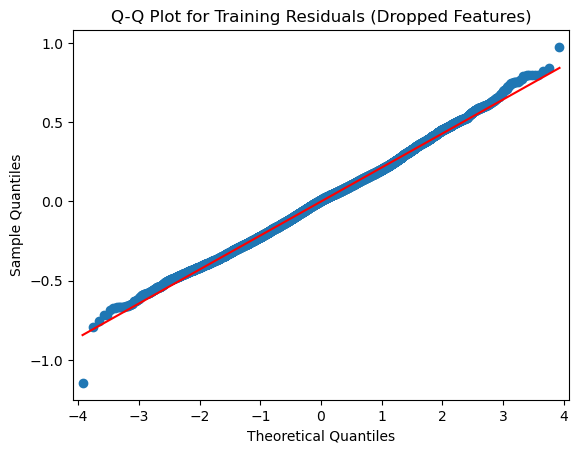

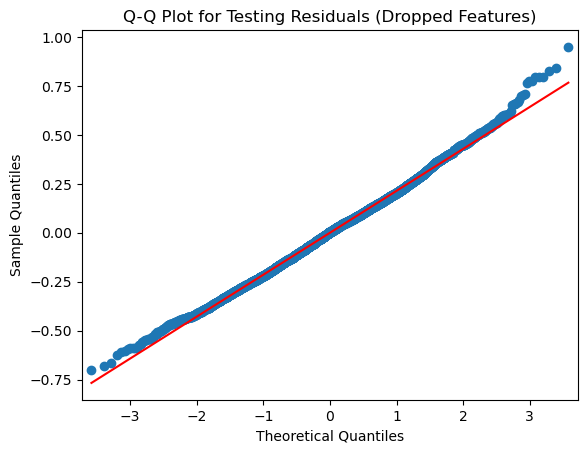

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, kstest
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

# 訓練集與測試集殘差
residuals_train_dropped = y_train - y_pred_train_dropped
residuals_test_dropped = y_test - y_pred_test_dropped

# 訓練集殘差 Q-Q 圖
sm.qqplot(residuals_train_dropped, line='s')
plt.title('Q-Q Plot for Training Residuals (Dropped Features)')
plt.show()

# 測試集殘差 Q-Q 圖
sm.qqplot(residuals_test_dropped, line='s')
plt.title('Q-Q Plot for Testing Residuals (Dropped Features)')
plt.show()

In [50]:
# Shapiro-Wilk 檢驗
stat_train, p_train = shapiro(residuals_train_dropped)
stat_test, p_test = shapiro(residuals_test_dropped)

print(f"Shapiro-Wilk Test (Train Residuals): Statistic = {stat_train:.4f}, p-value = {p_train:.4f}")
if p_train > 0.05:
    print("訓練集殘差符合常態分布 (接受 H0)")
else:
    print("訓練集殘差不符合常態分布 (拒絕 H0)")

print(f"Shapiro-Wilk Test (Test Residuals): Statistic = {stat_test:.4f}, p-value = {p_test:.4f}")
if p_test > 0.05:
    print("測試集殘差符合常態分布 (接受 H0)")
else:
    print("測試集殘差不符合常態分布 (拒絕 H0)")

Shapiro-Wilk Test (Train Residuals): Statistic = 0.9983, p-value = 0.0000
訓練集殘差不符合常態分布 (拒絕 H0)
Shapiro-Wilk Test (Test Residuals): Statistic = 0.9975, p-value = 0.0000
測試集殘差不符合常態分布 (拒絕 H0)


/Users/ccit0915/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


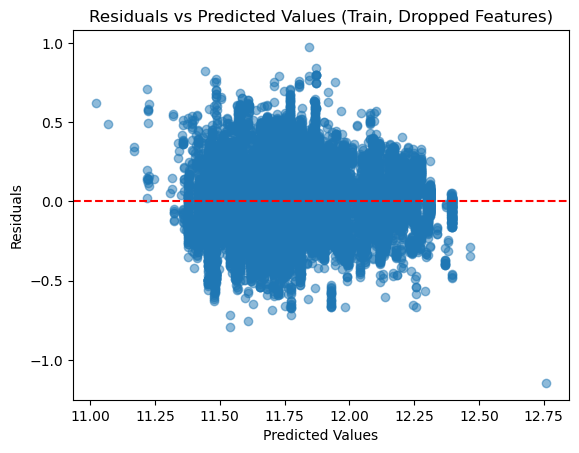

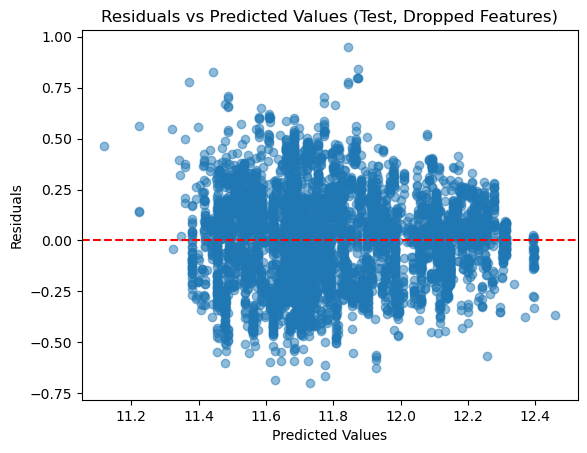

In [51]:
# 訓練集
plt.scatter(y_pred_train_dropped, residuals_train_dropped, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Train, Dropped Features)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 測試集
plt.scatter(y_pred_test_dropped, residuals_test_dropped, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Test, Dropped Features)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [52]:
# 訓練集 Breusch-Pagan 檢驗
X_train_const = sm.add_constant(X_train_subset_dropped)
bp_train = het_breuschpagan(residuals_train_dropped, X_train_const)

print(f"Breusch-Pagan Test (Train Residuals): LM Statistic = {bp_train[0]:.4f}, p-value = {bp_train[1]:.4f}")
if bp_train[1] > 0.05:
    print("訓練集殘差不存在異質性 (接受 H0)")
else:
    print("訓練集殘差存在異質性 (拒絕 H0)")

# 測試集 Breusch-Pagan 檢驗
X_test_const = sm.add_constant(X_test_subset_dropped)
bp_test = het_breuschpagan(residuals_test_dropped, X_test_const)

print(f"Breusch-Pagan Test (Test Residuals): LM Statistic = {bp_test[0]:.4f}, p-value = {bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("測試集殘差不存在異質性 (接受 H0)")
else:
    print("測試集殘差存在異質性 (拒絕 H0)")

Breusch-Pagan Test (Train Residuals): LM Statistic = 2111.7169, p-value = 0.0000
訓練集殘差存在異質性 (拒絕 H0)
Breusch-Pagan Test (Test Residuals): LM Statistic = 425.5779, p-value = 0.0000
測試集殘差存在異質性 (拒絕 H0)


In [53]:
# 訓練集 Durbin-Watson 檢驗
dw_train = durbin_watson(residuals_train_dropped)
print(f"Durbin-Watson Statistic (Train Residuals) = {dw_train:.4f}")
if 1.5 < dw_train < 2.5:
    print("訓練集殘差無自相關 (接受 H0)")
else:
    print("訓練集殘差存在自相關 (拒絕 H0)")

# 測試集 Durbin-Watson 檢驗
dw_test = durbin_watson(residuals_test_dropped)
print(f"Durbin-Watson Statistic (Test Residuals) = {dw_test:.4f}")
if 1.5 < dw_test < 2.5:
    print("測試集殘差無自相關 (接受 H0)")
else:
    print("測試集殘差存在自相關 (拒絕 H0)")

Durbin-Watson Statistic (Train Residuals) = 1.9939
訓練集殘差無自相關 (接受 H0)
Durbin-Watson Statistic (Test Residuals) = 1.9916
測試集殘差無自相關 (接受 H0)


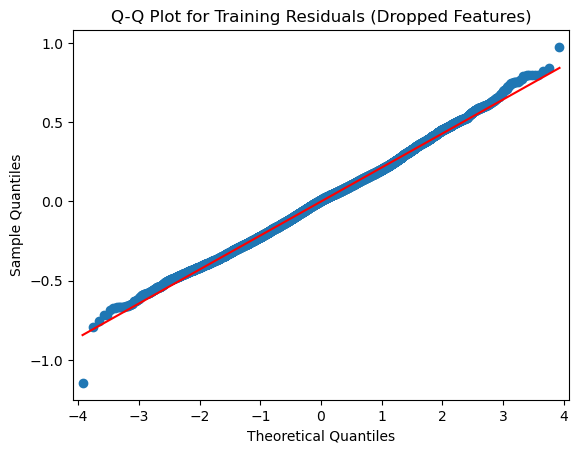

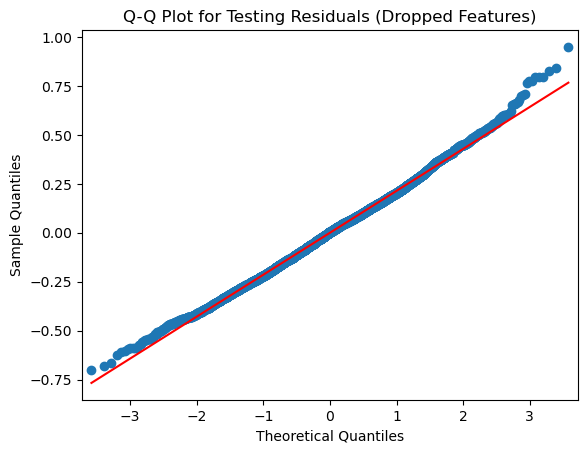

訓練集殘差清理後數據點數: 23093
測試集殘差清理後數據點數: 5773


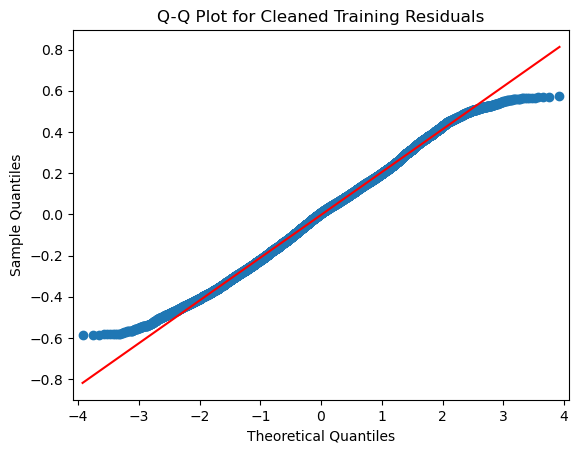

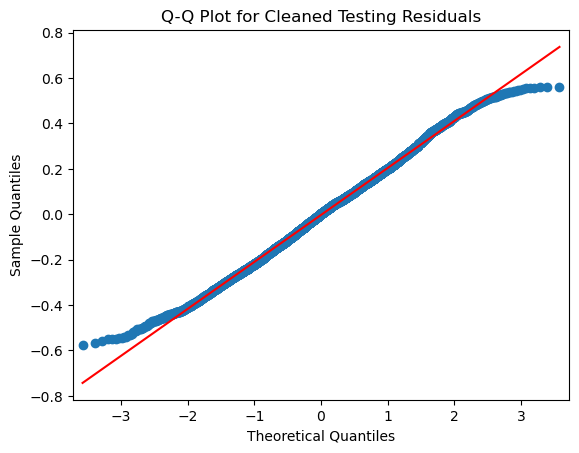

Shapiro-Wilk Test (Cleaned Training Residuals): Statistic = 0.99729323387146, p-value = 8.715814706363721e-20
Shapiro-Wilk Test (Cleaned Testing Residuals): Statistic = 0.997166097164154, p-value = 5.693753912794364e-09


/Users/ccit0915/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

# 假設 y_train 和 y_pred_train_dropped 是訓練集真實值與預測值
# 假設 y_test 和 y_pred_test_dropped 是測試集真實值與預測值
# 計算訓練集與測試集的殘差
residuals_train = y_train - y_pred_train_dropped
residuals_test = y_test - y_pred_test_dropped

# 繪製訓練集殘差 Q-Q 圖
sm.qqplot(residuals_train, line='s')
plt.title('Q-Q Plot for Training Residuals (Dropped Features)')
plt.show()

# 繪製測試集殘差 Q-Q 圖
sm.qqplot(residuals_test, line='s')
plt.title('Q-Q Plot for Testing Residuals (Dropped Features)')
plt.show()

# 定義移除離群值的函數
def remove_outliers(residuals, method="zscore", threshold=3):
    if method == "zscore":
        z_scores = (residuals - residuals.mean()) / residuals.std()
        return residuals[np.abs(z_scores) <= threshold]
    elif method == "iqr":
        Q1 = residuals.quantile(0.25)
        Q3 = residuals.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return residuals[(residuals >= lower_bound) & (residuals <= upper_bound)]

# 使用 IQR 方法移除離群值
cleaned_train_residuals = remove_outliers(residuals_train, method="iqr")
cleaned_test_residuals = remove_outliers(residuals_test, method="iqr")

# 確認清理後的殘差數據
print("訓練集殘差清理後數據點數:", len(cleaned_train_residuals))
print("測試集殘差清理後數據點數:", len(cleaned_test_residuals))

# 再次繪製清理後的 Q-Q 圖
sm.qqplot(cleaned_train_residuals, line='s')
plt.title('Q-Q Plot for Cleaned Training Residuals')
plt.show()

sm.qqplot(cleaned_test_residuals, line='s')
plt.title('Q-Q Plot for Cleaned Testing Residuals')
plt.show()

# 再次進行 Shapiro-Wilk 檢驗
shapiro_train_stat, shapiro_train_p = shapiro(cleaned_train_residuals)
shapiro_test_stat, shapiro_test_p = shapiro(cleaned_test_residuals)

print(f"Shapiro-Wilk Test (Cleaned Training Residuals): Statistic = {shapiro_train_stat}, p-value = {shapiro_train_p}")
print(f"Shapiro-Wilk Test (Cleaned Testing Residuals): Statistic = {shapiro_test_stat}, p-value = {shapiro_test_p}")

訓練集殘差清理後數據點數（z-score threshold 4）: 23271
測試集殘差清理後數據點數（z-score threshold 4）: 5819


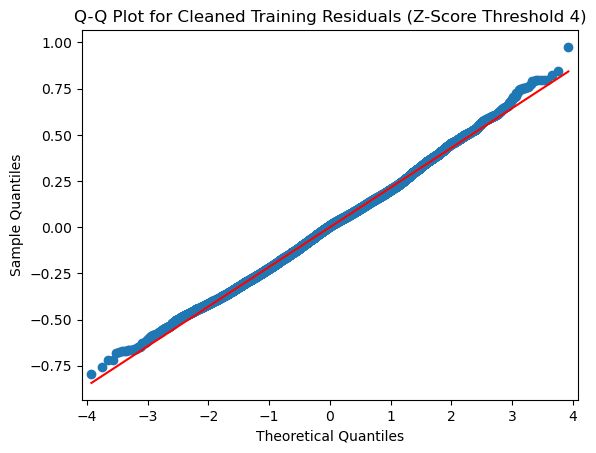

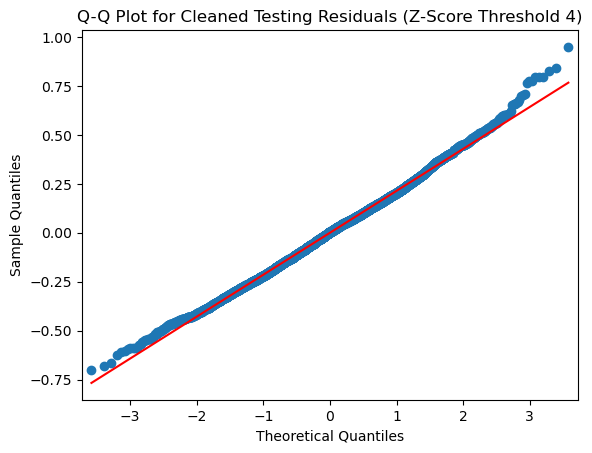

Shapiro-Wilk Test (Cleaned Training Residuals with Z-Score Threshold 4): Statistic = 0.9982947707176208, p-value = 3.5031925328139887e-15
Shapiro-Wilk Test (Cleaned Testing Residuals with Z-Score Threshold 4): Statistic = 0.997484564781189, p-value = 3.0755373359170335e-08


In [75]:
# 使用更高的 z-score 閾值（例如 4）
cleaned_train_residuals_zscore = remove_outliers(residuals_train, method="zscore", threshold=5)
cleaned_test_residuals_zscore = remove_outliers(residuals_test, method="zscore", threshold=5)

# 確認清理後的數據點數量
print("訓練集殘差清理後數據點數（z-score threshold 4）:", len(cleaned_train_residuals_zscore))
print("測試集殘差清理後數據點數（z-score threshold 4）:", len(cleaned_test_residuals_zscore))

# 繪製 Q-Q 圖
sm.qqplot(cleaned_train_residuals_zscore, line='s')
plt.title('Q-Q Plot for Cleaned Training Residuals (Z-Score Threshold 4)')
plt.show()

sm.qqplot(cleaned_test_residuals_zscore, line='s')
plt.title('Q-Q Plot for Cleaned Testing Residuals (Z-Score Threshold 4)')
plt.show()

# 進行 Shapiro-Wilk 檢驗
shapiro_train_stat_zscore, shapiro_train_p_zscore = shapiro(cleaned_train_residuals_zscore)
shapiro_test_stat_zscore, shapiro_test_p_zscore = shapiro(cleaned_test_residuals_zscore)

print(f"Shapiro-Wilk Test (Cleaned Training Residuals with Z-Score Threshold 4): Statistic = {shapiro_train_stat_zscore}, p-value = {shapiro_train_p_zscore}")
print(f"Shapiro-Wilk Test (Cleaned Testing Residuals with Z-Score Threshold 4): Statistic = {shapiro_test_stat_zscore}, p-value = {shapiro_test_p_zscore}")

In [130]:
from scipy.stats import shapiro

# 計算 Shapiro-Wilk test
stat_train, p_value_train = shapiro(residuals_train)

print(f"Shapiro-Wilk Test (訓練集): W = {stat_train:.4f}, p-value = {p_value_train:.4f}")

Shapiro-Wilk Test (訓練集): W = 0.9982, p-value = 0.0000


/Users/ccit0915/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [131]:
from scipy.stats import levene

# 使用訓練集的預測值與殘差進行變異數同質性檢定（可以將分組依據不同的變數）
stat_bf, p_value_bf = levene(y_train_filtered, residuals_train)

print(f"Brown-Forsythe Test (訓練集): Statistic = {stat_bf:.4f}, p-value = {p_value_bf:.4f}")

Brown-Forsythe Test (訓練集): Statistic = 6322.1973, p-value = 0.0000


In [132]:
from statsmodels.stats.stattools import durbin_watson

# 計算 Durbin-Watson 統計量
dw_stat_train = durbin_watson(residuals_train)

print(f"Durbin-Watson Test (訓練集): {dw_stat_train:.4f}")

Durbin-Watson Test (訓練集): 2.0045


In [113]:
# 檢查樣本數量
print(f"y_train shape: {y_train.shape}, y_pred_train_filtered shape: {y_pred_train_filtered.shape}")

y_train shape: (23272,), y_pred_train_filtered shape: (22909,)


In [115]:
# 將 y_pred_train_filtered 轉換為 pandas.Series
y_pred_train_filtered_series = pd.Series(y_pred_train_filtered, index=y_train.index[:len(y_pred_train_filtered)])

# 將兩個資料的索引對齊
y_train_aligned, y_pred_train_filtered_aligned = y_train.align(y_pred_train_filtered_series, join='inner')

In [116]:
# 計算對齊後的殘差
residuals_train = y_train_aligned - y_pred_train_filtered_aligned

In [117]:
# 將 y_pred_test_filtered 轉換為 pandas.Series
y_pred_test_filtered_series = pd.Series(y_pred_test_filtered, index=y_test.index[:len(y_pred_test_filtered)])

# 對齊索引
y_test_aligned, y_pred_test_filtered_aligned = y_test.align(y_pred_test_filtered_series, join='inner')

# 計算殘差
residuals_test = y_test_aligned - y_pred_test_filtered_aligned

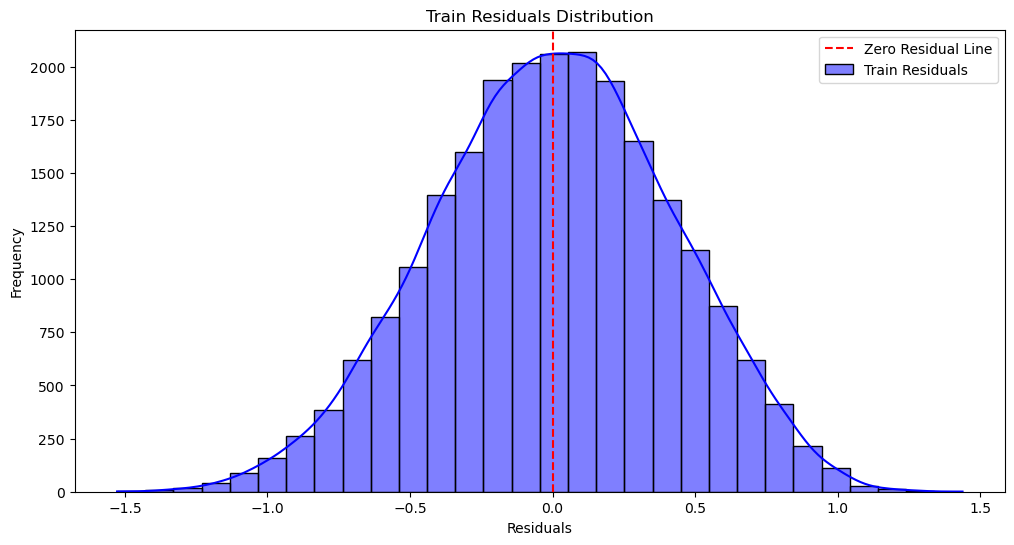

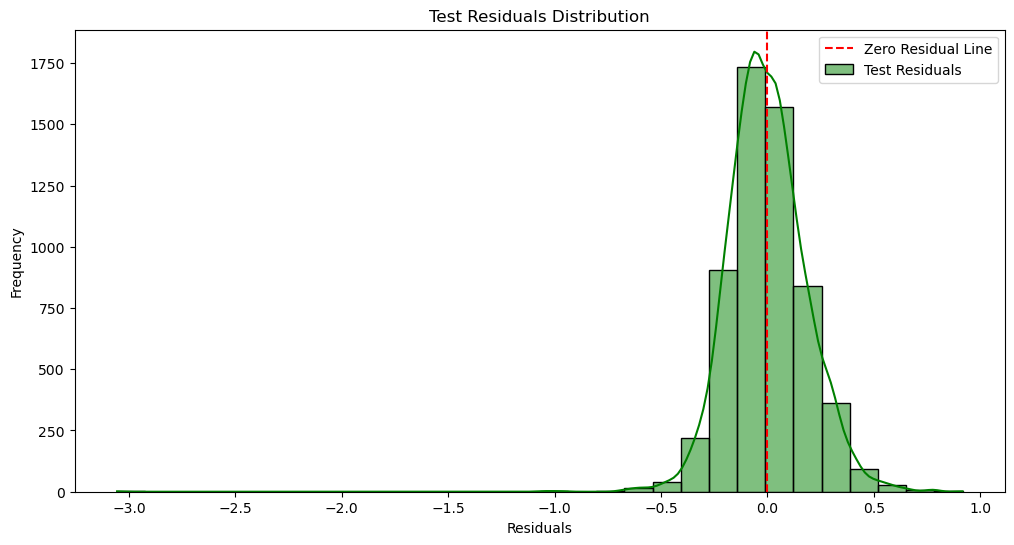

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 計算訓練集和測試集的殘差
residuals_train = y_train_aligned - y_pred_train_filtered_aligned
residuals_test = y_test_aligned - y_pred_test_filtered_aligned

# 可視化訓練集殘差
plt.figure(figsize=(12, 6))
sns.histplot(residuals_train, kde=True, bins=30, color='blue', label='Train Residuals')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Train Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 可視化測試集殘差
plt.figure(figsize=(12, 6))
sns.histplot(residuals_test, kde=True, bins=30, color='green', label='Test Residuals')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Test Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

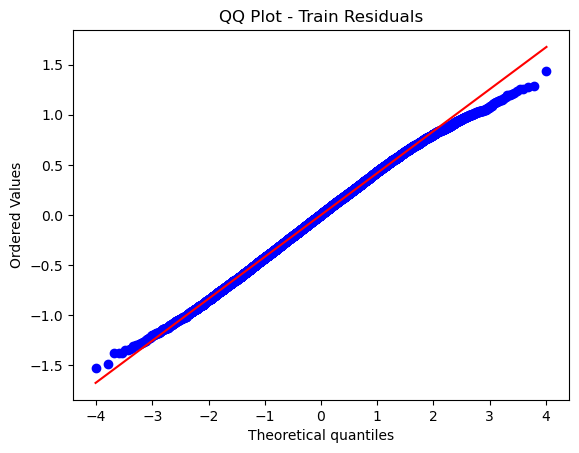

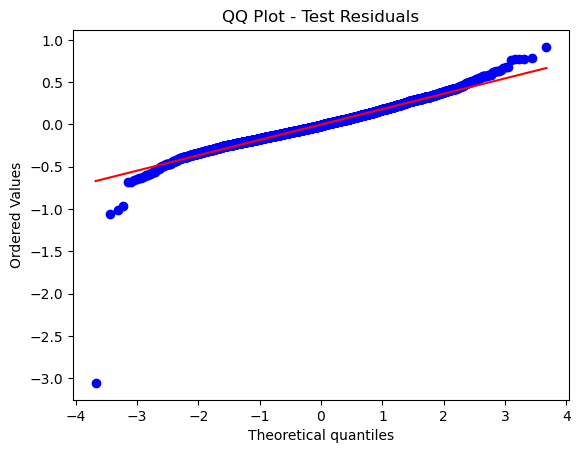

In [120]:
# 訓練集殘差 QQ 圖
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title('QQ Plot - Train Residuals')
plt.show()

# 測試集殘差 QQ 圖
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title('QQ Plot - Test Residuals')
plt.show()

In [125]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.api import add_constant

# 將 X_train 和 y_train 的索引對齊
X_train_aligned, y_train_aligned = X_train.align(y_train, join="inner", axis=0)
X_test_aligned, y_test_aligned = X_test.align(y_test, join="inner", axis=0)

# 計算訓練集的殘差（需要先確保 y_pred 已對齊）
residuals_train = y_train_aligned - y_pred_train_filtered_aligned
residuals_test = y_test_aligned - y_pred_test_filtered_aligned

# 訓練集異方差檢驗
X_train_const = add_constant(X_train_aligned)
bp_test_train = het_breuschpagan(residuals_train, X_train_const)
print("Train Heteroscedasticity Test:")
print(f"LM Statistic: {bp_test_train[0]}, p-value: {bp_test_train[1]}, "
      f"F-Statistic: {bp_test_train[2]}, F p-value: {bp_test_train[3]}")

# 測試集異方差檢驗
X_test_const = add_constant(X_test_aligned)
bp_test_test = het_breuschpagan(residuals_test, X_test_const)
print("Test Heteroscedasticity Test:")
print(f"LM Statistic: {bp_test_test[0]}, p-value: {bp_test_test[1]}, "
      f"F-Statistic: {bp_test_test[2]}, F p-value: {bp_test_test[3]}")

Train Heteroscedasticity Test:
LM Statistic: nan, p-value: nan, F-Statistic: nan, F p-value: nan
Test Heteroscedasticity Test:
LM Statistic: 277.25412925277936, p-value: 2.2382521200108493e-48, F-Statistic: 16.120811695768374, F p-value: 1.155182012359358e-49


In [105]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5).fit(X_train_selected, y_train)
print("最佳 alpha:", lasso_cv.alpha_)
selected_features = X_train_selected.columns[lasso_cv.coef_ != 0]
print("選出的特徵:", selected_features)

最佳 alpha: 528831640953.07135
選出的特徵: Index(['Parking Price_squared'], dtype='object')


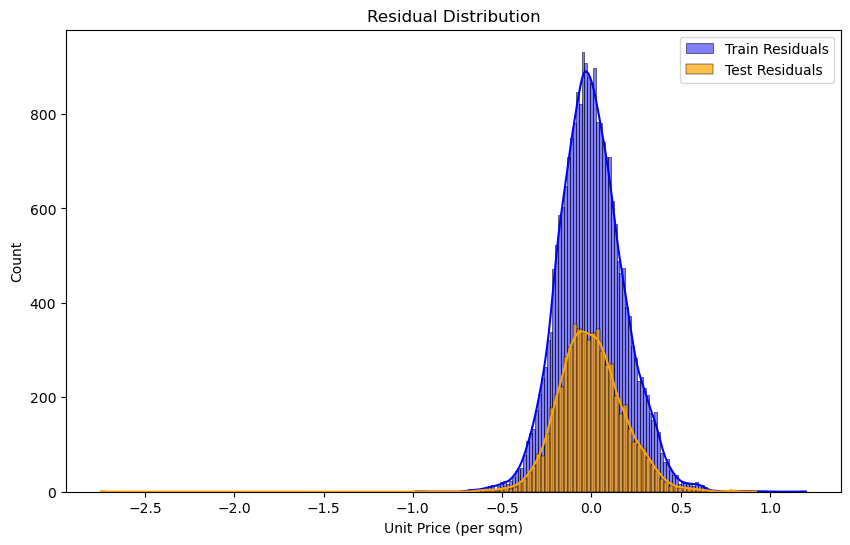

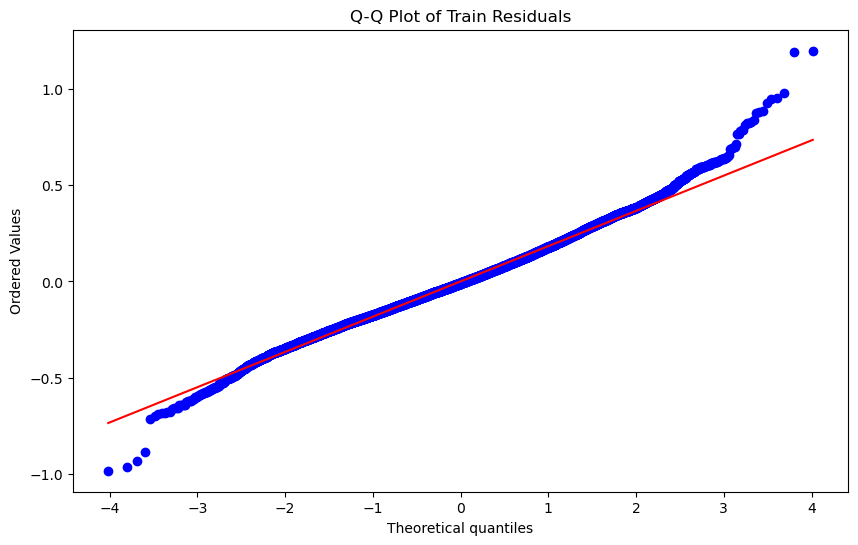

Shapiro-Wilk Test for Train Residuals: p-value = 0.0000


/Users/ccit0915/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, shapiro

# 計算殘差
residuals_train = y_train - y_pred_train_dropped
residuals_test = y_test - y_pred_test_dropped

# 殘差直方圖
plt.figure(figsize=(10, 6))
sns.histplot(residuals_train, kde=True, color="blue", label="Train Residuals")
sns.histplot(residuals_test, kde=True, color="orange", label="Test Residuals", alpha=0.7)
plt.title("Residual Distribution")
plt.legend()
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
probplot(residuals_train, dist="norm", plot=plt)
plt.title("Q-Q Plot of Train Residuals")
plt.show()

# 正態性檢驗（Shapiro-Wilk 檢驗）
shapiro_train = shapiro(residuals_train)
print(f"Shapiro-Wilk Test for Train Residuals: p-value = {shapiro_train.pvalue:.4f}")

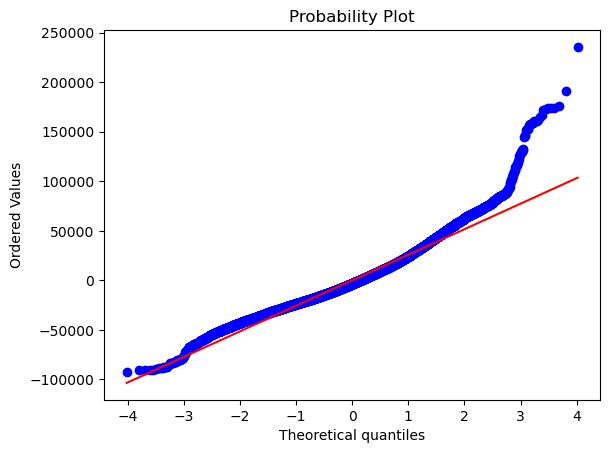

Shapiro-Wilk p-value: 0.0
殘差不符合正態分佈


In [107]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk p-value: {p_value}")
if p_value > 0.05:
    print("殘差符合正態分佈")
else:
    print("殘差不符合正態分佈")

In [108]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.tools import add_constant

X_with_const = add_constant(X_train_subset_dropped)  # 添加截距項
bp_test = het_breuschpagan(residuals, X_with_const)
print(f"Breusch-Pagan p-value: {bp_test[1]}")
if bp_test[1] > 0.05:
    print("無異方差假設成立")
else:
    print("異方差存在")

Breusch-Pagan p-value: 7.636980826318203e-225
異方差存在


In [109]:
import statsmodels.api as sm

# 訓練 statsmodels 模型
model_sm = sm.OLS(y_train, X_train_const).fit()

# 模型摘要
print(model_sm.summary())

                             OLS Regression Results                             
Dep. Variable:     Unit Price (per sqm)   R-squared:                       0.667
Model:                              OLS   Adj. R-squared:                  0.667
Method:                   Least Squares   F-statistic:                     3325.
Date:                  Sat, 30 Nov 2024   Prob (F-statistic):               0.00
Time:                          16:17:58   Log-Likelihood:                 6002.0
No. Observations:                 23272   AIC:                        -1.197e+04
Df Residuals:                     23257   BIC:                        -1.185e+04
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [64]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(model_poly_dropped, X_train_subset_dropped, y_train, cv=10, scoring='r2')
print(f"Cross-validated R² scores: {cv_r2}")
print(f"Mean CV R²: {cv_r2.mean():.4f}, Std Dev: {cv_r2.std():.4f}")

Cross-validated R² scores: [0.69579993 0.68391635 0.64261901 0.69237287 0.6489125  0.66026584
 0.66950561 0.68566321 0.659777   0.67627279]
Mean CV R²: 0.6715, Std Dev: 0.0174


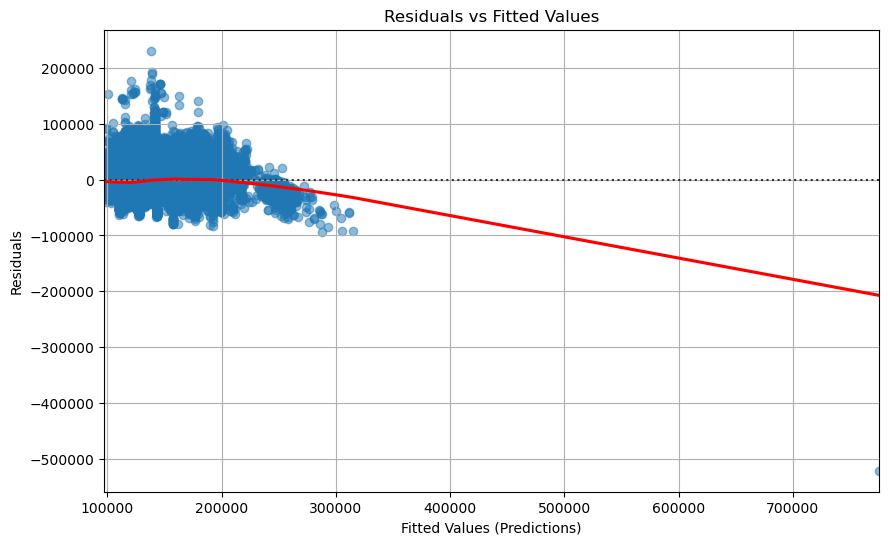

Breusch-Pagan Test p-value: 0.0000
There is heteroscedasticity in the model.


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# 殘差與預測值的視覺化
y_pred_train = model_poly.predict(X_train_subset)  # 訓練集預測值
residuals = y_train - y_pred_train  # 訓練集殘差

# 畫出殘差圖
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_train, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predictions)")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# 為 X_train_subset 添加常數項
X_train_with_const = sm.add_constant(X_train_subset)

# 進行Breusch-Pagan檢驗
bp_test = het_breuschpagan(residuals, X_train_with_const)
bp_test_p_value = bp_test[1]  # p-value

# 檢查 p-value 並解釋
print(f"Breusch-Pagan Test p-value: {bp_test_p_value:.4f}")

# 如果 p-value < 0.05，說明存在異方差性，可以進一步在圖上標示
if bp_test_p_value < 0.05:
    print("There is heteroscedasticity in the model.")
else:
    print("No heteroscedasticity detected.")

In [106]:
import statsmodels.api as sm

# 在 X_train 上加上常數項（截距）
X_train_with_intercept = sm.add_constant(X_train)

# 擬合模型
model = sm.OLS(y_train, X_train_with_intercept).fit()

# 顯示模型摘要，包括 P 值
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Unit Price (per sqm)   R-squared:                       0.662
Model:                              OLS   Adj. R-squared:                  0.661
Method:                   Least Squares   F-statistic:                     2526.
Date:                  Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                          13:55:29   Log-Likelihood:            -2.7035e+05
No. Observations:                 23272   AIC:                         5.407e+05
Df Residuals:                     23253   BIC:                         5.409e+05
Df Model:                            18                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

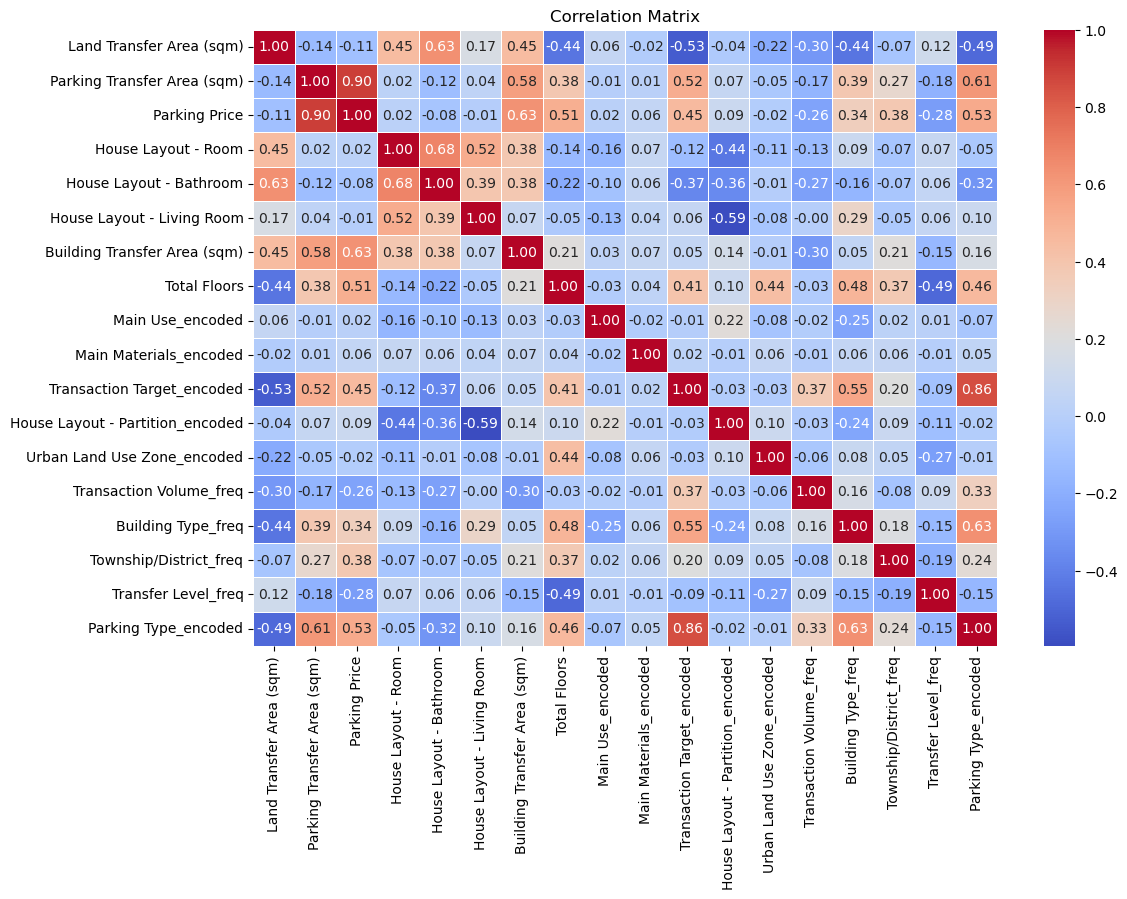

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算相關係數矩陣
correlation_matrix = X_train.corr()

# 繪製相關係數矩陣熱力圖
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_train_with_intercept = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_with_intercept.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_intercept.values, i) for i in range(X_train_with_intercept.shape[1])]
print(vif_data)

                            Variable        VIF
0                              const  81.261369
1           Land Transfer Area (sqm)   3.720495
2        Parking Transfer Area (sqm)   7.242102
3                      Parking Price   8.541693
4                House Layout - Room   2.582522
5            House Layout - Bathroom   3.010658
6         House Layout - Living Room   1.955647
7       Building Transfer Area (sqm)   4.221257
8                       Total Floors   3.259748
9                   Main Use_encoded   1.153132
10            Main Materials_encoded   1.040644
11        Transaction Target_encoded   4.303996
12  House Layout - Partition_encoded   2.070977
13       Urban Land Use Zone_encoded   1.539782
14           Transaction Volume_freq   1.724733
15                Building Type_freq   2.434972
16            Township/District_freq   1.293483
17               Transfer Level_freq   1.389296
18              Parking Type_encoded   5.527202
